# CSCI 6840 - HW2 Anomaly Event Detection
We are using the concept of overlapping sliding windows in HW2. Let’s say we have window size = 1000. Then the first window will be from [0, 999], the second window will be from [1, 1000], the third one will be from [2, 1001]… I recommend you should label normal and anomaly events for the first window based on q percentile and then for the rest windows you need to update the threshold by calculating the q percentile and label the newly added data record, i.e., 1000th data point for the second window and 1001st data point for the third window.

You are required to use a threshold based method and a fixed size window to find anomaly events. The window step size is 1.
Use numpy.percentile linear method to calculate percentiles of the Nitrate data at AG_NO3_fill_cells_remove_NAN.csv Download AG_NO3_fill_cells_remove_NAN.csv.
Find an appropriate window size and initial threshold.
In total, we have 77 anomaly events. Calculate your normal event detection accuracy rate (i.e., correct normal detection cases/total normal cases) and anomaly event detection accuracy rate (i.e., correct anomaly detection cases/total extreme cases)
Submit your Github URL and add me as your collaborator
In Readme file:
An image to show anomaly events (can be a scatter plot)

Normal event detection accuracy rate (at least 80%) and anomaly event detection accuracy rate (at least 75%)
Due Feb 5.

## Import dependent libraries
We are using `pandas`, `numpy`, and `matplotlib.pyplot` for this assignment.

In [32]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the values
First we load the csv from the `./content` folder and load the `nitrate` column values into the `nitrate_values` variable.

In [33]:
# Load the data
data_input = pd.read_csv('./content/AG_NO3_fill_cells_remove_NAN.csv')
nitrate_values = data_input['NO3N'].values  # Assuming 'NO3N' is the column name for Nitrate

## Assign input parameters
According to the assignment requirements, we have a designated:
- `window_size` of `300`
- `threshold` of `90` percent
- `window_step_size` of `1`


In [34]:
# Parameters
window_size_input = 300
threshold_input = 90  # You may adjust this multiplier based on your data
window_step_size_input = 1

## Define our `detect_anomalies` function

In [35]:
# Function to calculate percentiles and detect anomalies
def detect_anomalies(data, window_size, threshold_percent, window_step_size):
    anomalies = []
    thresholds_output = []

    for i in range(len(data) - window_size + window_step_size):
        window_data = data[i : i + window_size]
        threshold = np.percentile(window_data, threshold_percent)  # You may adjust the percentile
        thresholds_output.append(threshold)

        if i == 0:
            anomalies.extend([1 if val > threshold else 0 for val in window_data])
        else:
            new_data_point = data[i + window_size - 1]
            anomalies.append(1 if new_data_point > threshold else 0)

    return anomalies, thresholds_output

## Detect anomalies, calculate accuracy rates

In [36]:
# Detect anomalies and calculate accuracy rates
anomaly_labels, thresholds = detect_anomalies(nitrate_values, window_size_input, threshold_input, window_step_size_input)

## Add the anomaly labels to the dataframe

In [37]:
# Add the anomaly labels to the DataFrame
data_input['Anomaly_Label'] = anomaly_labels

## Calculate accuracy rates

In [38]:
# Calculate accuracy rates
true_positives = np.sum((data_input['Anomaly_Label'] == 1) & (data_input['Student_Flag'] == 1))
true_negatives = np.sum((data_input['Anomaly_Label'] == 0) & (data_input['Student_Flag'] == 0))
false_positives = np.sum((data_input['Anomaly_Label'] == 1) & (data_input['Student_Flag'] == 0))
false_negatives = np.sum((data_input['Anomaly_Label'] == 0) & (data_input['Student_Flag'] == 1))

normal_accuracy_rate = true_negatives / (true_negatives + false_positives)
anomaly_accuracy_rate = true_positives / (true_positives + false_negatives)

print(f"Normal Event Detection Accuracy Rate: {normal_accuracy_rate * 100:.2f}%")
print(f"Anomaly Event Detection Accuracy Rate: {anomaly_accuracy_rate * 100:.2f}%")

Normal Event Detection Accuracy Rate: 85.43%
Anomaly Event Detection Accuracy Rate: 75.32%


## Plot the data and detected anomalies

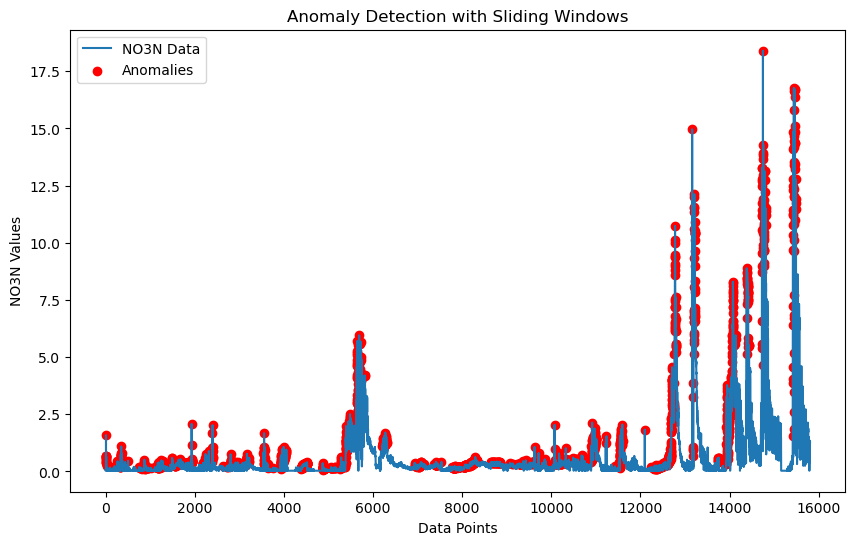

In [39]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_input['NO3N'], label='NO3N Data')
plt.scatter(data_input[data_input['Anomaly_Label'] == 1].index, data_input[data_input['Anomaly_Label'] == 1]['NO3N'], color='red', label='Anomalies')
plt.xlabel('Data Points')
plt.ylabel('NO3N Values')
plt.legend()
plt.title('Anomaly Detection with Sliding Windows')
plt.show()